[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/antoniotrapote/chord-prediction-tfm/blob/main/anexos/notebooks/03_modelado/08_comparativa_metricas.ipynb)
[![View on GitHub](https://img.shields.io/badge/View_on-GitHub-black?logo=github)](https://github.com/antoniotrapote/chord-prediction-tfm/blob/main/anexos/notebooks/03_modelado/08_comparativa_metricas.ipynb)

# Comparativa de modelos
En este notebook, se comparan los resultados de los diferentes modelos entrenados para la predicción de acordes dada una secuencia (contexto).

Los modelos se han evaluado con varios datasets diferentes, porque el desarollo de los modelos ha sido un proceso iterativo. Conservamos las métricas de los diferentes modelos con los dos últimos datasets, que son:
- "songdb_funcional_v3.csv": Dataset con acordes en notación funcional (I, ii, V7, etc.)
- "songdb_funcional_v4.csv": dataset con una mejora en el preprocesado (transcripción funcional) que incluye dominantes secundarios y sustitutos y amplía el número de prestamos intermodales.

En la nomenclatura de los modelos, se indica _v1 o _v2 en función del dataset con el que se ha entrenado.

**NOTA IMPORTANTE**: Las métricas de  los modelos GRU y LSTM son aproximadas, ya que a pesar de haber fijado semillas, el entrenamiento de estos modelos no es completamente determinista.

In [2]:
import pandas as pd

In [7]:
USER = "antoniotrapote"
REPO = "chord-prediction-tfm"
BRANCH = "main"
PATH_IN_REPO = "anexos/models/metricas.csv"
URL = f"https://raw.githubusercontent.com/{USER}/{REPO}/{BRANCH}/{PATH_IN_REPO}"

metricas = pd.read_csv(URL)
metricas.sort_values(by=['MRR', 'Top@1'], ascending=[False, False])

,Modelo,Dataset,Top@1,Top@3,Top@5,MRR,PPL,loss
12,LSTM Fine-tuning v3,songdb_funcional_v4,0.4504,0.6937,0.7762,0.5957,9.5073,2.2521
5,LSTM RandomSearch v1,songdb_funcional_v3,0.4412,0.6897,0.7822,0.5923,7.9589,2.0743
11,LSTM RandomSearch v2,songdb_funcional_v4,0.4456,0.6927,0.7715,0.5914,8.4259,2.1313
4,LSTM v1,songdb_funcional_v3,0.4345,0.6787,0.7680,0.5840,8.3556,2.1229
10,LSTM v2,songdb_funcional_v4,0.4306,0.6829,0.7669,0.5809,8.7552,2.1697
9,GRU v2,songdb_funcional_v4,0.4320,0.6775,0.7616,0.5797,8.9978,2.1970
3,GRU v1,songdb_funcional_v3,0.4273,0.6698,0.7671,0.5790,8.5608,2.1472
8,KN GridSearch v2,songdb_funcional_v4,0.4329,0.6610,0.7408,0.5728,NaN,NaN
2,KN GridSearch v1,songdb_funcional_v3,0.4219,0.6526,0.7445,0.5667,NaN,NaN
6,KN (trigramas) v2,songdb_funcional_v4,0.4152,0.6516,0.7375,0.5605,NaN,NaN


## Métricas simplificadas para incluir en el documento principal del TFM

In [8]:
# Filtrar solo dataset v4 y seleccionar columnas necesarias
tabla_v4 = metricas[metricas["Dataset"] == "songdb_funcional_v4"][
    ["Modelo", "Top@1", "Top@3", "Top@5", "MRR"]
]
tabla_v4.sort_values(by=['MRR', 'Top@1'], ascending=[False, False])

,Modelo,Top@1,Top@3,Top@5,MRR
12,LSTM Fine-tuning v3,0.4504,0.6937,0.7762,0.5957
11,LSTM RandomSearch v2,0.4456,0.6927,0.7715,0.5914
10,LSTM v2,0.4306,0.6829,0.7669,0.5809
9,GRU v2,0.4320,0.6775,0.7616,0.5797
8,KN GridSearch v2,0.4329,0.6610,0.7408,0.5728
6,KN (trigramas) v2,0.4152,0.6516,0.7375,0.5605
7,HMM (T/S/D) v2,0.1916,0.4189,0.5124,0.3458


### Top@1 y MRR de los modelos entrenados con el dataset "songdb_funcional_v4.csv"

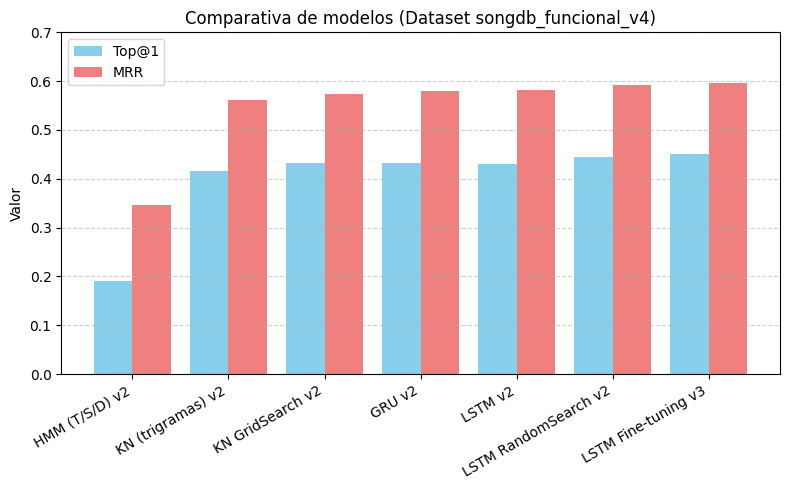

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo dataset v4 y seleccionar columnas necesarias
data_v4 = metricas[metricas["Dataset"] == "songdb_funcional_v4"][
    ["Modelo", "Top@1", "MRR"]
]

# Reordenar modelos en el orden que quieras que aparezcan
orden_modelos = [
    "HMM (T/S/D) v2",
    "KN (trigramas) v2",
    "KN GridSearch v2",
    "GRU v2",
    "LSTM v2",
    "LSTM RandomSearch v2",
    "LSTM Fine-tuning v3",
]
data_v4 = data_v4.set_index("Modelo").loc[orden_modelos].reset_index()

# Gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
x = range(len(data_v4))

ax.bar([i - 0.2 for i in x], data_v4["Top@1"], width=0.4, 
       label="Top@1", color="skyblue")
ax.bar([i + 0.2 for i in x], data_v4["MRR"], width=0.4, 
       label="MRR", color="lightcoral")

# Personalización
ax.set_xticks(x)
ax.set_xticklabels(data_v4["Modelo"], rotation=30, ha="right")
ax.set_ylabel("Valor")
ax.set_ylim(0, 0.7)
ax.set_title("Comparativa de modelos (Dataset songdb_funcional_v4)")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## Conclusiones

### HMM vs KN
La comparación entre **HMM** y **Kneser–Ney (KN)** deja claro que el HMM se queda muy por detrás en rendimiento.  

Esto se explica por dos razones principales:  
1. **Reducción excesiva del vocabulario**: el HMM simplifica todos los acordes a solo tres estados (Tónica, Subdominante y Dominante). Aunque el modelo puede aprender transiciones entre estas funciones, pierde la riqueza de la armonía real.  
2. **Utilidad limitada para el usuario**: un músico o sistema que recibe como predicción únicamente T/S/D no obtiene información suficiente para reconstruir progresiones reales.  

En contraste, el modelo KN utiliza progresiones funcionales completas (I, ii, V7, bVII, etc.), ofreciendo resultados mucho más útiles y métricas claramente superiores.

---

### KN vs Modelos neuronales
Al comparar el baseline **KN** con los modelos neuronales (GRU, LSTM y su versión fine-tuned), se observan varias conclusiones clave:

1. **Mejoras mínimas en métricas**  
   - Las diferencias en Top@K y MRR entre KN y las RNN son pequeñas y, en muchos casos, anecdóticas.  
   - Incluso el modelo **LSTM Fine-tuning v3**, el mejor de los neuronales, solo mejora ligeramente (Top@1 ≈ +0.017, MRR ≈ +0.023) respecto al KN.

2. **Indeterminación inherente**  
   - Cada entrenamiento de una RNN puede producir resultados distintos debido a su naturaleza estocástica.  
   - Esto añade variabilidad en métricas, lo que dificulta asegurar un comportamiento consistente frente a la estabilidad de los modelos estadísticos.

3. **Complejidad y coste computacional**  
   - Las RNN requieren mucha más configuración: ajuste de hiperparámetros, pruebas con distintos schedulers, regularización, etc.  
   - El entrenamiento consume tiempo y recursos significativamente mayores, sin que la mejora de métricas lo justifique plenamente.
   

---

### Conclusión general
Los experimentos confirman que los modelos neuronales (GRU, LSTM) **son capaces de reproducir e incluso superar levemente** al modelo KN en métricas como Top@3 o MRR, especialmente tras aplicar técnicas de **fine-tuning**.  

Sin embargo, estas mejoras no son sustanciales si se ponderan frente al coste en **complejidad, recursos y estabilidad**.  

Aplicando el **principio de parsimonia**, concluimos que el modelo **Kneser–Ney (KN) con GridSearch** es la opción más adecuada para su uso en producción:  
- **Sencillo y eficiente** en entrenamiento e inferencia.  
- **Estable e interpretable**, evitando la variabilidad de las RNN.  
- **Competitivo en métricas**, a pesar de su menor complejidad.  

En definitiva, aunque las redes neuronales ofrecen un marco experimental interesante y confirman la validez del enfoque, el modelo **KN** logra el mejor equilibrio entre precisión, eficiencia y aplicabilidad práctica para la predicción de acordes basada en armonía funcional.
